In [1]:
import os
import cv2
import matplotlib.pyplot as plt


<Figure size 1500x700 with 0 Axes>

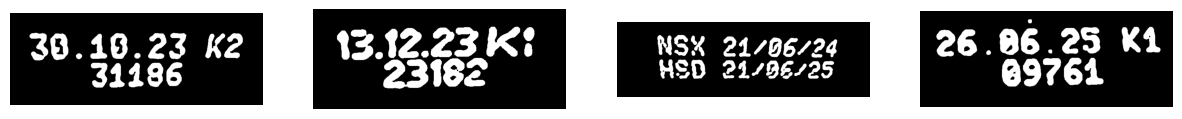

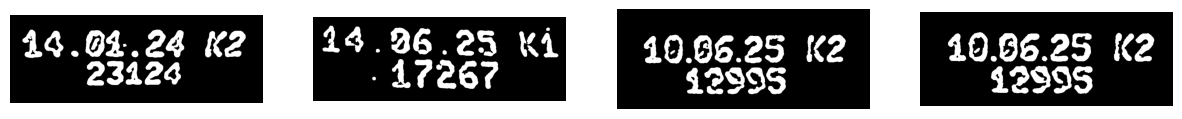

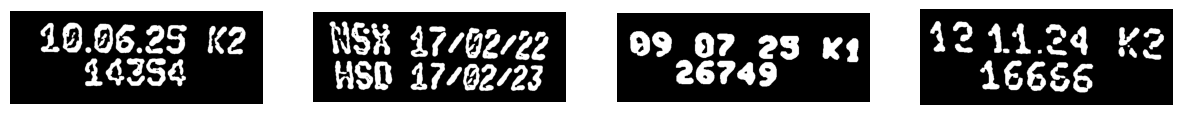

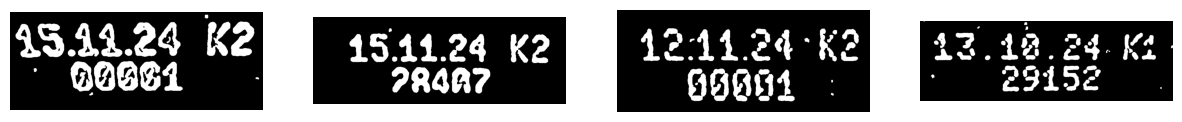

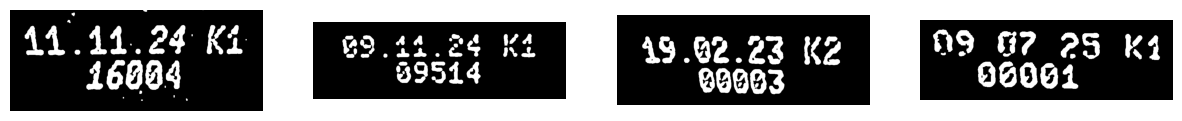

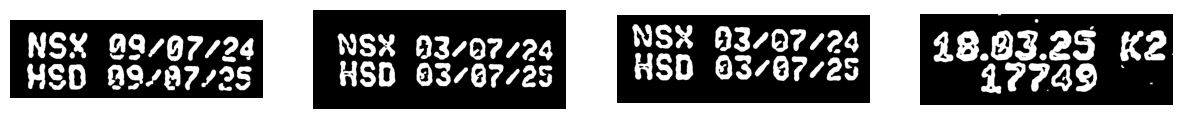

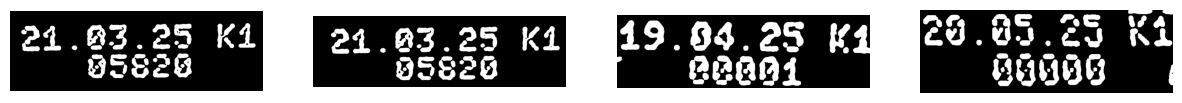

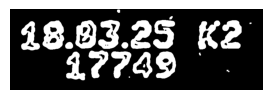

In [3]:

def process_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    stages = []

    kernel_size = 3
    max_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_size, kernel_size))

    blur_image = cv2.GaussianBlur(image, (7, 7), 0)
    stages.append(('Gaussian Blur', blur_image))
    denoised_image = cv2.fastNlMeansDenoising(blur_image, None, 15, 7, 21)
    stages.append(('Denoised', denoised_image))
    more_denoised = cv2.medianBlur(denoised_image, 11)
    stages.append(('More Denoised', more_denoised))

    # Thresholding
    thresh = cv2.adaptiveThreshold(
        more_denoised,
        maxValue=255,
        adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        thresholdType=cv2.THRESH_BINARY_INV,
        blockSize=29,
        C=2
    )
    stages.append(('Threshold', thresh))
    
    dilated = cv2.dilate(thresh, max_kernel, iterations=2)
    stages.append(('Dilated', dilated))
    
    closed = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, max_kernel)
    stages.append(('Closed', closed))
    
    return stages[-1][1]

photos_path = './data/raw'
photo_files = [f for f in os.listdir(photos_path) if os.path.isfile(os.path.join(photos_path, f))]

count = 0
show_per_row = 4
plt.figure(figsize=(15, 7))
for photo in photo_files:
    if count == 0:
        plt.figure(figsize=(15, 7))
    photo_path = os.path.join(photos_path, photo)
    processed = process_image(photo_path);
    
    plt.subplot(1, show_per_row, count+1)
    plt.axis('off')
    plt.imshow(cv2.cvtColor(processed, cv2.COLOR_BGR2RGB))
    count += 1
    if count == show_per_row:
        plt.show()
        count = 0



In [8]:
# save the processed imaphotos_path = './data/raw'
photo_files = [f for f in os.listdir(photos_path) if os.path.isfile(os.path.join(photos_path, f))]

count = 0
show_per_row = 4
for photo in photo_files:
    photo_path = os.path.join(photos_path, photo)
    processed = process_image(photo_path);
    cv2.imwrite(f'./data/{photo}', processed)
    print(f'Processed {photo}')
    
    


Processed photo1720756974 (1).jpeg
Processed photo1720756974 (2).jpeg
Processed photo1720756974 (3).jpeg
Processed photo1720756974 (4).jpeg
Processed photo1720756974 (5).jpeg
Processed photo1720756974 (6).jpeg
Processed photo1720756974 (7).jpeg
Processed photo1720756974 (8).jpeg
Processed photo1720756974 (9).jpeg
Processed photo1720756974.jpeg
Processed photo1720756978 (1).jpeg
Processed photo1720756978 (2).jpeg
Processed photo1720756978 (3).jpeg
Processed photo1720756978 (4).jpeg
Processed photo1720756978 (5).jpeg
Processed photo1720756978 (6).jpeg
Processed photo1720756978 (7).jpeg
Processed photo1720756978 (8).jpeg
Processed photo1720756978 (9).jpeg
Processed photo1720756978.jpeg
Processed photo1720756979 (1).jpeg
Processed photo1720756979 (2).jpeg
Processed photo1720756979.jpeg
Processed Salinan kardus-1.jpeg
Processed Salinan kardus-2.jpeg
Processed Salinan kardus-3.jpeg
Processed Salinan kardus-4.jpeg
Processed Salinan kardus-5.jpeg
Processed Salinan kardus.jpeg


In [ ]:
import json
import cv2
import numpy as np
from PIL import Image


In [2]:
import json
import cv2
import numpy as np
import os

# Define the directory where your files are stored
src_dir = './data/preprocessed'

# Function to crop image using polygon
def crop_polygon(image, polygon):
    # Create a mask from the polygon
    mask = np.zeros(image.shape[:2], dtype=np.uint8)
    points = np.array(polygon, dtype=np.int32)
    cv2.fillPoly(mask, [points], 255)

    # Extract the bounding box
    rect = cv2.boundingRect(points)
    x, y, w, h = rect

    # Crop the bounding region
    cropped = image[y:y+h, x:x+w]

    # Apply mask to the cropped region
    mask_cropped = mask[y:y+h, x:x+w]
    result = cv2.bitwise_and(cropped, cropped, mask=mask_cropped)

    return result

# Loop through all JSON files and corresponding images in the directory
for filename in os.listdir(src_dir):
    if filename.endswith('.json'):
        # Load JSON data
        json_file = os.path.join(src_dir, filename)
        with open(json_file) as f:
            data = json.load(f)

        # Get corresponding image filename
        image_filename = filename.replace('.json', '.jpeg')  # Assuming image files are .jpeg
        image_path = os.path.join(src_dir, image_filename)

        # Load the image
        image = cv2.imread(image_path)

        # Check if image is loaded properly
        if image is None:
            print(f"Error loading image from {image_path}")
            continue

        # Dictionary to track the count of each label
        label_count = {}

        # Process each shape from the JSON data
        for shape in data['shapes']:
            label = shape['label']

            # Track the number of times a label has been used
            if label in label_count:
                label_count[label] += 1
            else:
                label_count[label] = 1

            # Generate a unique file name for each cropped image
            unique_filename = f"{filename.replace('.json', '')}_{label}_{label_count[label]}.png"
            cropped_image_path = os.path.join('./processed', unique_filename)

            # Crop and save the image
            polygon = shape['points']
            cropped_image = crop_polygon(image, polygon)
            cv2.imwrite(cropped_image_path, cropped_image)
            print(f"Cropped region saved to {cropped_image_path}")


Cropped region saved to ./processed\photo1720756974 (1)_3_1.png
Cropped region saved to ./processed\photo1720756974 (1)_0_1.png
Cropped region saved to ./processed\photo1720756974 (1)_1_1.png
Cropped region saved to ./processed\photo1720756974 (1)_0_2.png
Cropped region saved to ./processed\photo1720756974 (1)_2_1.png
Cropped region saved to ./processed\photo1720756974 (1)_3_2.png
Cropped region saved to ./processed\photo1720756974 (1)_K_1.png
Cropped region saved to ./processed\photo1720756974 (1)_2_2.png
Cropped region saved to ./processed\photo1720756974 (1)_3_3.png
Cropped region saved to ./processed\photo1720756974 (1)_1_2.png
Cropped region saved to ./processed\photo1720756974 (1)_1_3.png
Cropped region saved to ./processed\photo1720756974 (1)_8_1.png
Cropped region saved to ./processed\photo1720756974 (1)_6_1.png
Cropped region saved to ./processed\photo1720756974 (2)_1_1.png
Cropped region saved to ./processed\photo1720756974 (2)_3_1.png
Cropped region saved to ./processed\phot

In [10]:
# import os

# # Define the directory where your files are stored
# src_dir = './src'

# # Loop through all files in the directory
# for filename in os.listdir(src_dir):
#     if filename.endswith('.png'):
#         file_path = os.path.join(src_dir, filename)
        
#         # Delete the file
#         os.remove(file_path)
#         print(f"Deleted {file_path}")


FileNotFoundError: [WinError 3] The system cannot find the path specified: './src'

NameError: name 'Image' is not defined

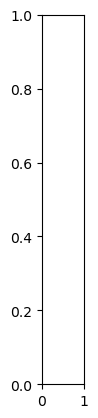

In [3]:
import os
import matplotlib.pyplot as plt

processed = "./processed"

processed_files = os.listdir(processed)

count = 0

show_per_row = 10

# plot with label from processed filename.split('_')[1]
for i, filename in enumerate(processed_files):
    # show with plt figure, one row contain 5 images
    plt.subplot(1, show_per_row, count+1)
    img = Image.open(os.path.join(processed, filename))
    plt.imshow(img)
    plt.axis('off')
    true_filename = filename.split('_')[-2]
    plt.title(true_filename)
    count += 1
    if count == show_per_row:
        plt.show()
        count = 0
        
    
